<a href="https://colab.research.google.com/github/nandana-sajju-pillai/assignment_/blob/main/Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Preparation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('/content/partpdf_1758763736656_airbnb.xlsx')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
1,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
2,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
3,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
4,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0


In [5]:
df['Host Since']=pd.to_datetime(df['Host Since'])
print(df.head())
print(df.info())

   Host Id Host Since                                 Name Neighbourhood   \
0      500 2008-06-26   Gorgeous 1 BR with Private Balcony      Manhattan   
1      500 2008-06-26             Trendy Times Square Loft      Manhattan   
2     1039 2008-07-25   Big Greenpoint 1BD w/ Skyline View       Brooklyn   
3     1783 2008-08-12                         Amazing Also      Manhattan   
4     2078 2008-08-15  Colorful, quiet, & near the subway!       Brooklyn   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  10024.0   3.0   
1     Apartment                        95.0     Private room  10036.0   3.0   
2     Apartment                       100.0  Entire home/apt  11222.0   1.0   
3     Apartment                       100.0  Entire home/apt  10004.0   1.0   
4     Apartment                        90.0     Private room  11201.0   1.0   

   Number of Records  Number Of Reviews  Price  Review Scores 

From the 'Host Since' column I would create a column that denotes the number of days or months or years that the host has had the property for. It is easier to encode and scale and would be easier for the user to understand rather than dates.Longer they have had the property, the price may be less as it isnt brand new and might be worn out, while also being not too old to be considered vintage and thus more valuable.

## Handling Missing Data

In [6]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8320
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


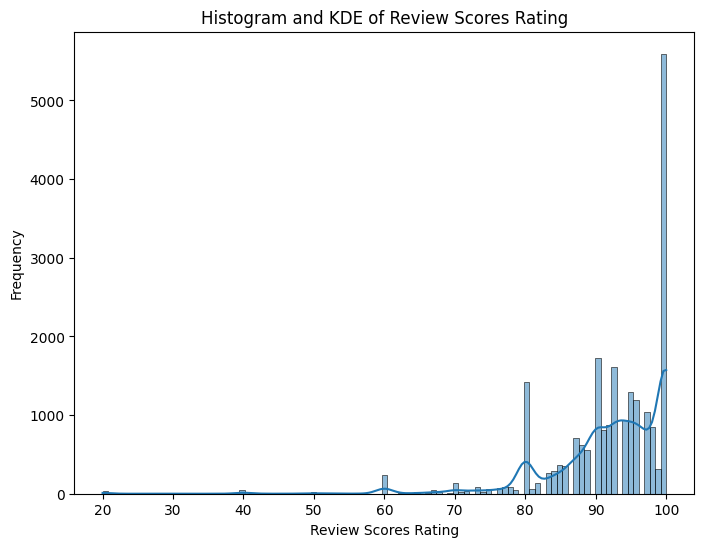

In [7]:
column_name = 'Review Scores Rating'

plt.figure(figsize=(8, 6))
sns.histplot(df[column_name], kde=True)
plt.title(f'Histogram and KDE of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

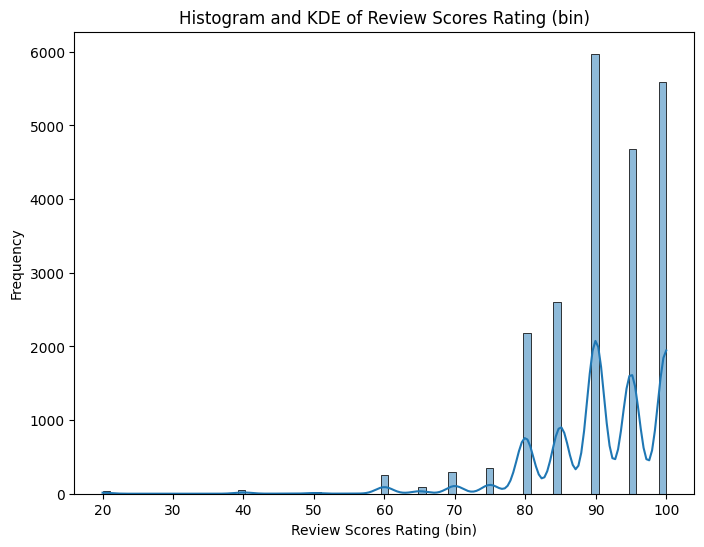

In [8]:
column_name = 'Review Scores Rating (bin)'

plt.figure(figsize=(8, 6))
sns.histplot(df[column_name], kde=True)
plt.title(f'Histogram and KDE of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [9]:
median_value = df[['Review Scores Rating','Review Scores Rating (bin)']].median()

df[['Review Scores Rating','Review Scores Rating (bin)']] = df[['Review Scores Rating','Review Scores Rating (bin)']].fillna(median_value)

In [10]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),0
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


The 'Review Scores Rating' and 'Review Scores Rating (bin)' column has missing values is handled with median value. This is done as it is a numerical column and has negative skewed distribution.




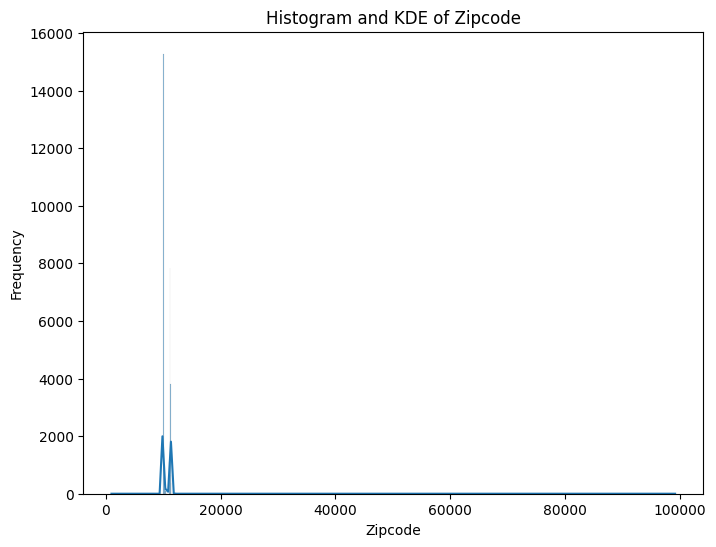

In [11]:
column_name = 'Zipcode'

plt.figure(figsize=(8, 6))
sns.histplot(df[column_name], kde=True)
plt.title(f'Histogram and KDE of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

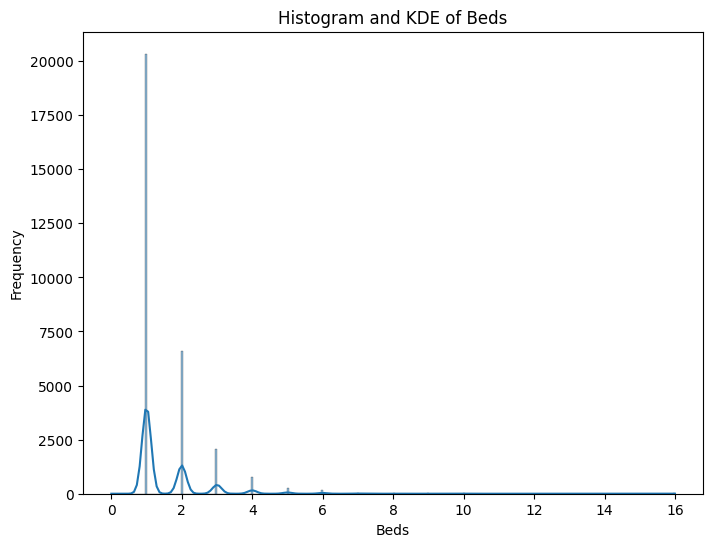

In [12]:
column_name = 'Beds'

plt.figure(figsize=(8, 6))
sns.histplot(df[column_name], kde=True)
plt.title(f'Histogram and KDE of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [13]:
median_value = df[['Zipcode','Beds']].median()
mode_value = df['Property Type'].mode()[0]
df[['Zipcode','Beds']] = df[['Zipcode','Beds']].fillna(median_value)
df['Property Type']=df['Property Type'].fillna(mode_value)

In [14]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,0
Beds,0
Number of Records,0


In [15]:
print(df.columns)

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip()

### Dropping Unwanted Columns

In [17]:
df=df.drop(['Host Id'],axis=1)

### Outlier Detection

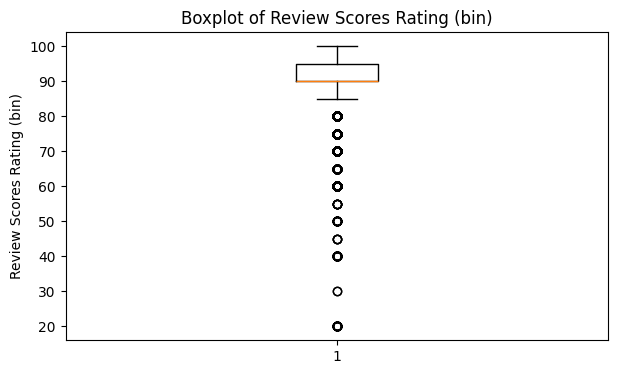

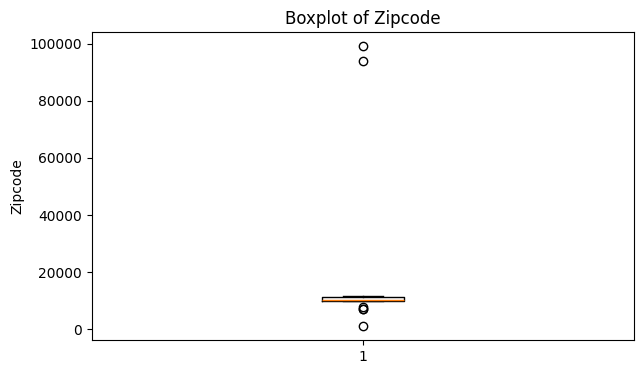

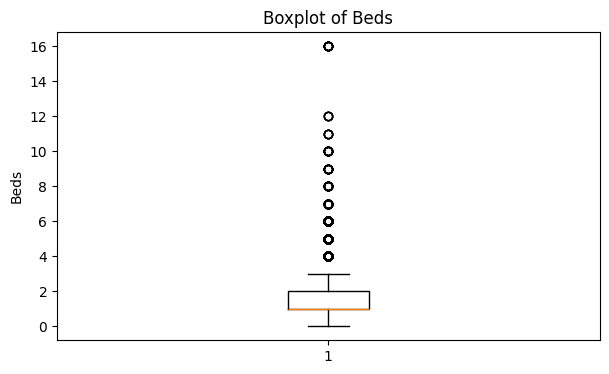

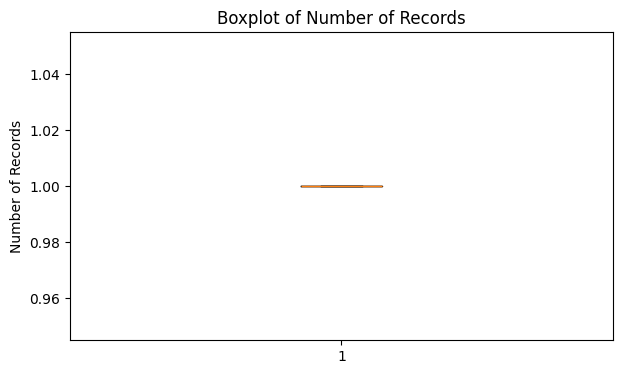

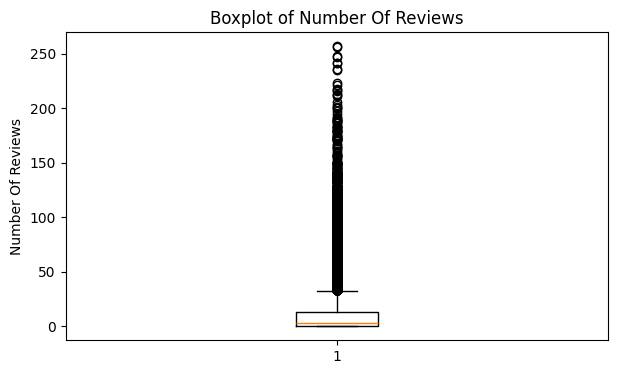

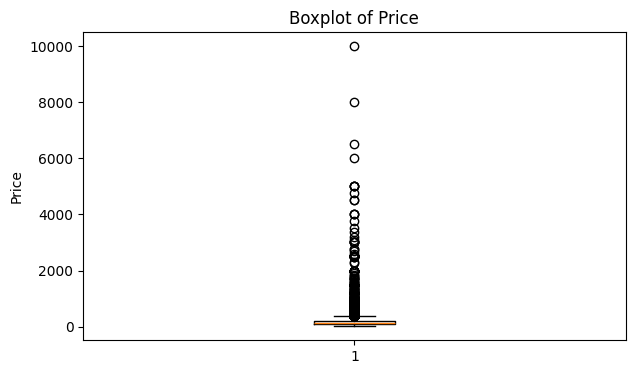

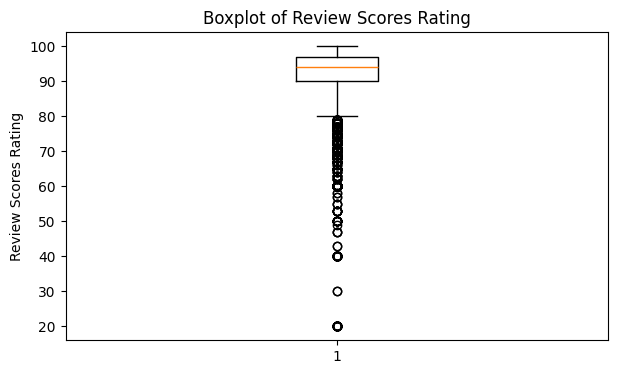

In [18]:
import matplotlib.pyplot as plt

numerical_cols = ['Review Scores Rating (bin)','Zipcode','Beds','Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating']
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [19]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

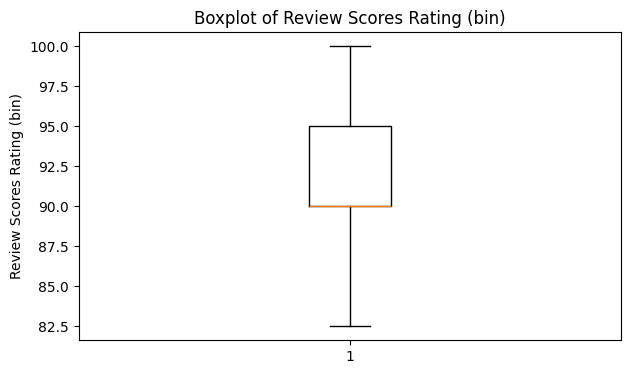

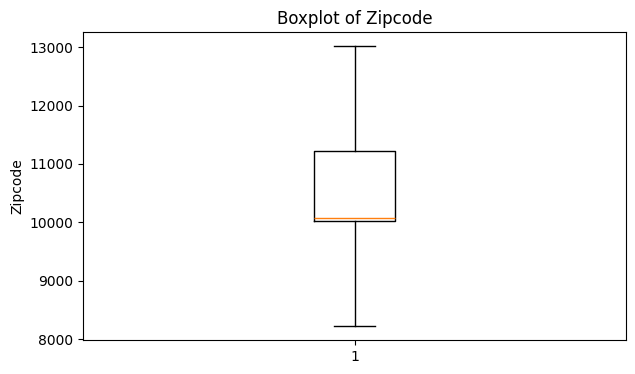

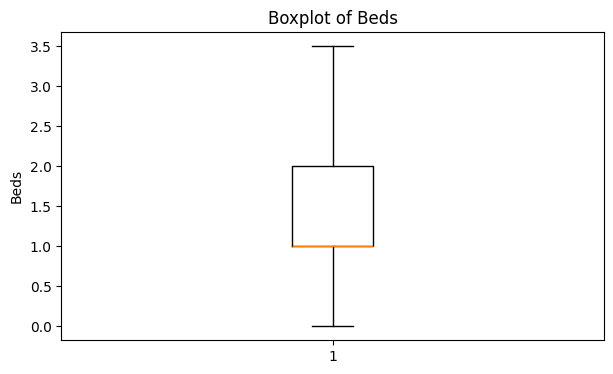

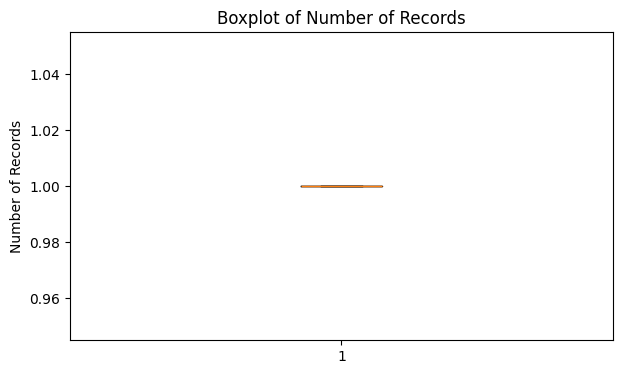

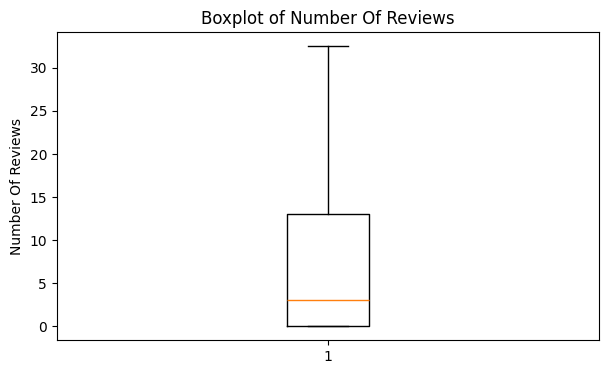

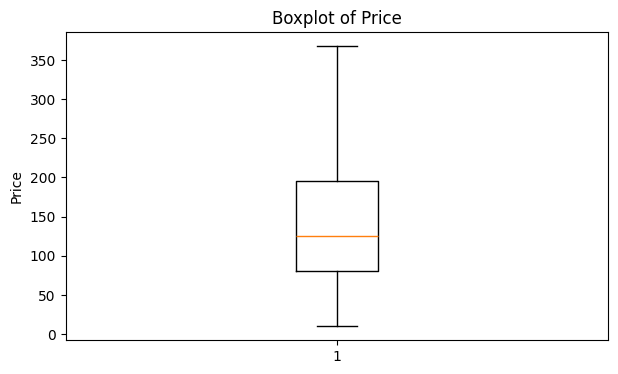

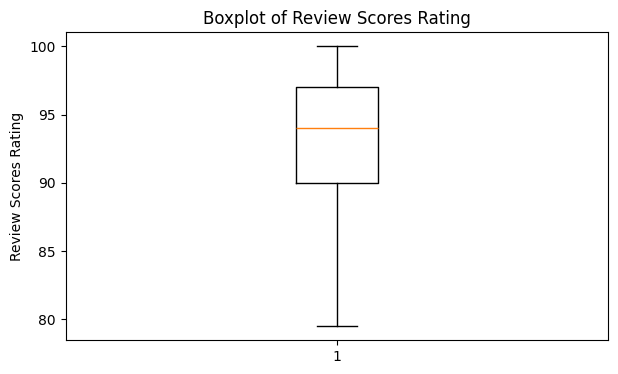

In [20]:
numerical_cols = ['Review Scores Rating (bin)','Zipcode','Beds','Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating']
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

## Advanced Feature Engineering

In [21]:
df_without_feature_engg = df.copy()
df['Neighbourhood_RoomType'] = df['Neighbourhood'].astype(str) + '_' + df['Room Type'].astype(str)
df = df.drop(['Neighbourhood', 'Room Type'], axis=1)

In [22]:
df.head()

,Host Since,Name,Property Type,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Neighbourhood_RoomType
0,2008-06-26,Gorgeous 1 BR with Private Balcony,Apartment,90.0,10024.0,3.0,1,0.0,199.0,94.0,Manhattan_Entire home/apt
1,2008-06-26,Trendy Times Square Loft,Apartment,95.0,10036.0,3.0,1,32.5,367.5,96.0,Manhattan_Private room
2,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Apartment,100.0,11222.0,1.0,1,4.0,149.0,100.0,Brooklyn_Entire home/apt
3,2008-08-12,Amazing Also,Apartment,100.0,10004.0,1.0,1,9.0,250.0,100.0,Manhattan_Entire home/apt
4,2008-08-15,"Colorful, quiet, & near the subway!",Apartment,90.0,11201.0,1.0,1,32.5,90.0,94.0,Brooklyn_Private room


### Encoding

In [23]:
categorical_cols = ['Name', 'Property Type', 'Neighbourhood_RoomType']

# One-hot encode the specified columns
df = pd.get_dummies(df, columns=categorical_cols)


In [24]:
categorical_cols = ['Name', 'Property Type', 'Neighbourhood','Room Type']

# One-hot encode the specified columns
df_without_feature_engg = pd.get_dummies(df_without_feature_engg, columns=categorical_cols)

In [25]:
# For df
df['Host Since'] = pd.to_datetime(df['Host Since'], format='%d/%m/%Y')
df['host_year'] = df['Host Since'].dt.year
df = df.drop(columns=['Host Since'])

# For df_without_feature_engg
df_without_feature_engg['Host Since'] = pd.to_datetime(df_without_feature_engg['Host Since'], format='%d/%m/%Y')
df_without_feature_engg['host_year'] = df_without_feature_engg['Host Since'].dt.year
df_without_feature_engg = df_without_feature_engg.drop(columns=['Host Since'])


### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Zipcode', 'Beds','Number of Records', 'Number Of Reviews','Review Scores Rating','Review Scores Rating (bin)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [27]:
numerical_cols = ['Zipcode', 'Beds','Number of Records', 'Number Of Reviews','Review Scores Rating','Review Scores Rating (bin)']
scaler = StandardScaler()
df_without_feature_engg[numerical_cols] = scaler.fit_transform(df_without_feature_engg[numerical_cols])

### Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Target
target = 'Price'

# Features
features_with_engg = [col for col in df.columns if col != target]
features_without_engg = [col for col in df_without_feature_engg.columns if col != target]

X1 = df[features_with_engg]
y1 = df[target]

X2 = df_without_feature_engg[features_without_engg]
y2 = df_without_feature_engg[target]

# Train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#  Fast Random Forest settings
fast_rf = RandomForestRegressor(
    n_estimators=10,     # drastically fewer trees
    max_depth=5,         # very shallow trees
    n_jobs=-1,           # use all CPU cores
    random_state=42
)

# Model with feature engineering
fast_rf.fit(X1_train, y1_train)
pred1 = fast_rf.predict(X1_test)
rmse1 = np.sqrt(mean_squared_error(y1_test, pred1))

# Model without feature engineering
fast_rf.fit(X2_train, y2_train)
pred2 = fast_rf.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))

# Results
print("RMSE with feature engineering:", rmse1)
print("RMSE without feature engineering:", rmse2)



###  Model Performance Comparison

- **RMSE with feature engineering**: *54.95*  
- **RMSE without feature engineering**: *55.6*

###  Insight

The model without feature engineering performed better. While engineered features often help, they can sometimes introduce noise or redundancy. Interaction features aim to capture relationships between variables that aren't obvious individually—like how a host's tenure might affect pricing differently depending on location or property type. When done well, they reveal deeper patterns that raw features miss.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Target and features
target = 'Price'
features = [col for col in df_without_feature_engg.columns if col != target]

X = df_without_feature_engg[features]
y = df_without_feature_engg[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final model
final_rf = RandomForestRegressor(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)
final_rf.fit(X_train, y_train)
pred = final_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Final RMSE:", rmse)


### 📈 Final Model Evaluation

**Final RMSE**: *48.72*

This RMSE value means that, on average, the predicted price differs from the actual price by about ₹48.72. For a host, this gives a practical sense of how accurate the model is—if their listing is priced at ₹1,000, the prediction might typically be off by ±₹49. This level of error is relatively low, suggesting the model is reasonably reliable for price estimation.
